### 솔루션 링크

In [ ]:
#  https://github.com/Sancho-kim/LinAlg4DS

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

2.4498401746994428e-18


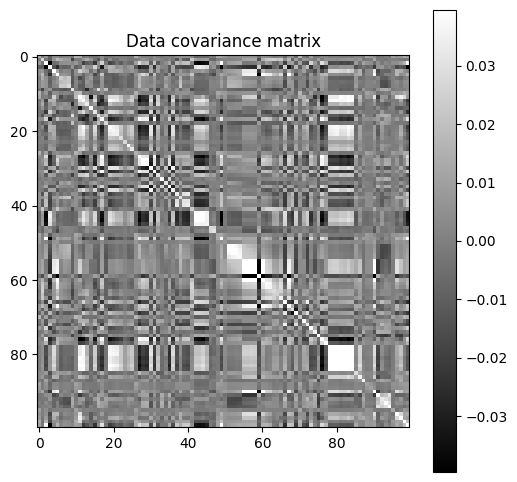

In [5]:
# read the data into a pandas dataframe
url  = 'https://archive.ics.uci.edu/ml/machine-learning-databases/communities/communities.data'
data = pd.read_csv(url,sep=',',header=None)

# attach column labels (don't worry, I didn't type this all in by hand, lol)
data.columns = [ 'state', 'county', 'community', 'communityname', 'fold', 'population', 'householdsize', 'racepctblack', 'racePctWhite',
'racePctAsian', 'racePctHisp', 'agePct12t21', 'agePct12t29', 'agePct16t24', 'agePct65up', 'numbUrban', 'pctUrban', 'medIncome', 'pctWWage',
'pctWFarmSelf', 'pctWInvInc', 'pctWSocSec', 'pctWPubAsst', 'pctWRetire', 'medFamInc', 'perCapInc', 'whitePerCap', 'blackPerCap', 'indianPerCap',
'AsianPerCap', 'OtherPerCap', 'HispPerCap', 'NumUnderPov', 'PctPopUnderPov', 'PctLess9thGrade', 'PctNotHSGrad', 'PctBSorMore', 'PctUnemployed', 'PctEmploy',
'PctEmplManu', 'PctEmplProfServ', 'PctOccupManu', 'PctOccupMgmtProf', 'MalePctDivorce', 'MalePctNevMarr', 'FemalePctDiv', 'TotalPctDiv', 'PersPerFam', 'PctFam2Par',
'PctKids2Par', 'PctYoungKids2Par', 'PctTeen2Par', 'PctWorkMomYoungKids', 'PctWorkMom', 'NumIlleg', 'PctIlleg', 'NumImmig', 'PctImmigRecent', 'PctImmigRec5',
'PctImmigRec8', 'PctImmigRec10', 'PctRecentImmig', 'PctRecImmig5', 'PctRecImmig8', 'PctRecImmig10', 'PctSpeakEnglOnly', 'PctNotSpeakEnglWell', 'PctLargHouseFam', 'PctLargHouseOccup',
'PersPerOccupHous', 'PersPerOwnOccHous', 'PersPerRentOccHous', 'PctPersOwnOccup', 'PctPersDenseHous', 'PctHousLess3BR', 'MedNumBR', 'HousVacant', 'PctHousOccup', 'PctHousOwnOcc',
'PctVacantBoarded', 'PctVacMore6Mos', 'MedYrHousBuilt', 'PctHousNoPhone', 'PctWOFullPlumb', 'OwnOccLowQuart', 'OwnOccMedVal', 'OwnOccHiQuart', 'RentLowQ', 'RentMedian',
'RentHighQ', 'MedRent', 'MedRentPctHousInc', 'MedOwnCostPctInc', 'MedOwnCostPctIncNoMtg', 'NumInShelters', 'NumStreet', 'PctForeignBorn', 'PctBornSameState', 'PctSameHouse85',
'PctSameCity85', 'PctSameState85', 'LemasSwornFT', 'LemasSwFTPerPop', 'LemasSwFTFieldOps', 'LemasSwFTFieldPerPop', 'LemasTotalReq', 'LemasTotReqPerPop', 'PolicReqPerOffic', 'PolicPerPop',
'RacialMatchCommPol', 'PctPolicWhite', 'PctPolicBlack', 'PctPolicHisp', 'PctPolicAsian', 'PctPolicMinor', 'OfficAssgnDrugUnits', 'NumKindsDrugsSeiz', 'PolicAveOTWorked', 'LandArea',
'PopDens', 'PctUsePubTrans', 'PolicCars', 'PolicOperBudg', 'LemasPctPolicOnPatr', 'LemasGangUnitDeploy', 'LemasPctOfficDrugUn', 'PolicBudgPerPop', 'ViolentCrimesPerPop',
 ]

# have a look at the data
data

# extract only the numeric data
numberDataset = data._get_numeric_data()

# drop a few additional columns, and convert to a numpy array
dataMat = numberDataset.drop(['state','fold'],axis=1).values
dataMat

# compute the mean of each data feature
datamean = np.mean(dataMat,axis=0)

# mean-center the data using broadcasting
dataMatM = dataMat - datamean

# confirm that any given feature has mean=0 (or very close...)
print(np.mean(dataMatM[:,0]))


# Now to compute the covariance matrix
covMat = dataMatM.T @ dataMatM  # data matrix times its transpose
covMat /= (dataMatM.shape[0]-1) # divide by N-1

# dynamic color scaling
clim = np.max(np.abs(covMat)) * .2

# and show it
plt.figure(figsize=(6,6))
plt.imshow(covMat,vmin=-clim,vmax=clim,cmap='gray')
plt.colorbar()
plt.title('Data covariance matrix')
plt.savefig('Figure_06_01.png',dpi=300)
plt.show()

### [연습문제 6-1]


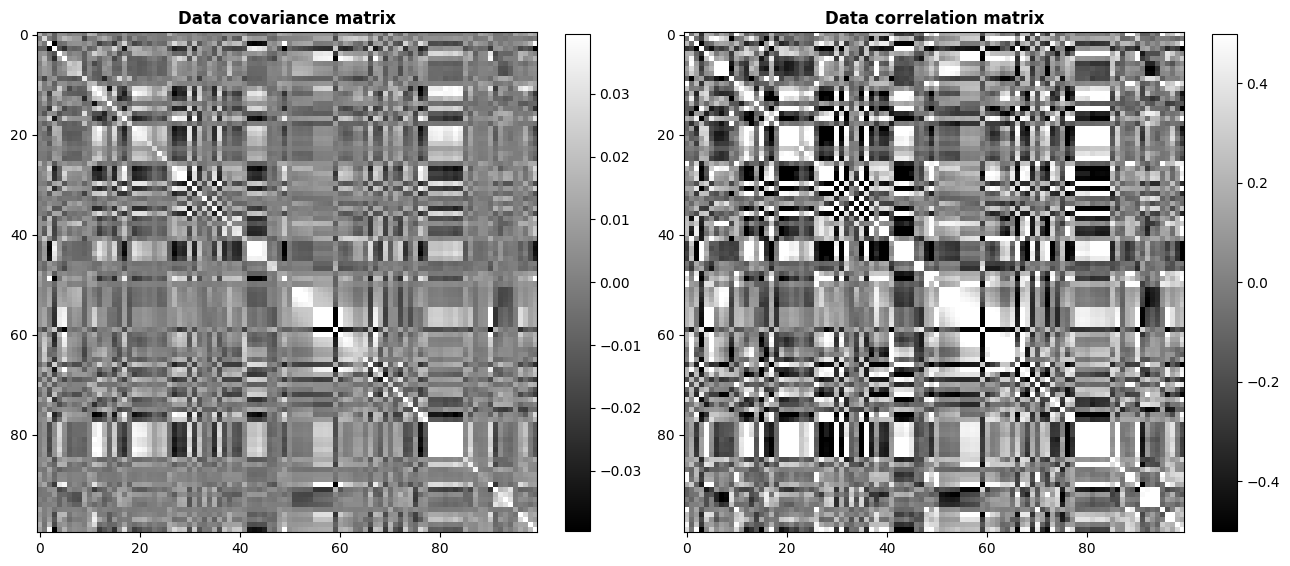

In [6]:
# Diagonal matrix of inverse standard deviations
variances = np.diag(covMat) # variances are the diagonals of a covariance
standard_devs = np.sqrt( variances )
S = np.diag( 1/standard_devs )

# you can also do this in one line:
#S = np.diag( 1/np.sqrt(np.diag(covMat)) )


# compute the correlation matrix
corrMat = S @ covMat @ S


# and show the matrices
fig,axs = plt.subplots(1,2,figsize=(13,6))
h1 = axs[0].imshow(covMat,vmin=-clim,vmax=clim,cmap='gray')
axs[0].set_title('Data covariance matrix',fontweight='bold')

h2 = axs[1].imshow(corrMat,vmin=-.5,vmax=.5,cmap='gray')
axs[1].set_title('Data correlation matrix',fontweight='bold')

fig.colorbar(h1,ax=axs[0],fraction=.045)
fig.colorbar(h2,ax=axs[1],fraction=.045)

plt.tight_layout()
plt.savefig('Figure_06_06.png',dpi=300)
plt.show()

In [7]:
# a bit of code to explore specific pairs of correlations

# here list two indices into the correlation matrix (row, col)
i,j = 43,17

# the printed tuple will show the correlation and the pairs of variables
corrMat[i,j], data.columns[i], data.columns[j]

(-0.7603179079300488, 'MalePctDivorce', 'medIncome')

### [연습문제 6-2]


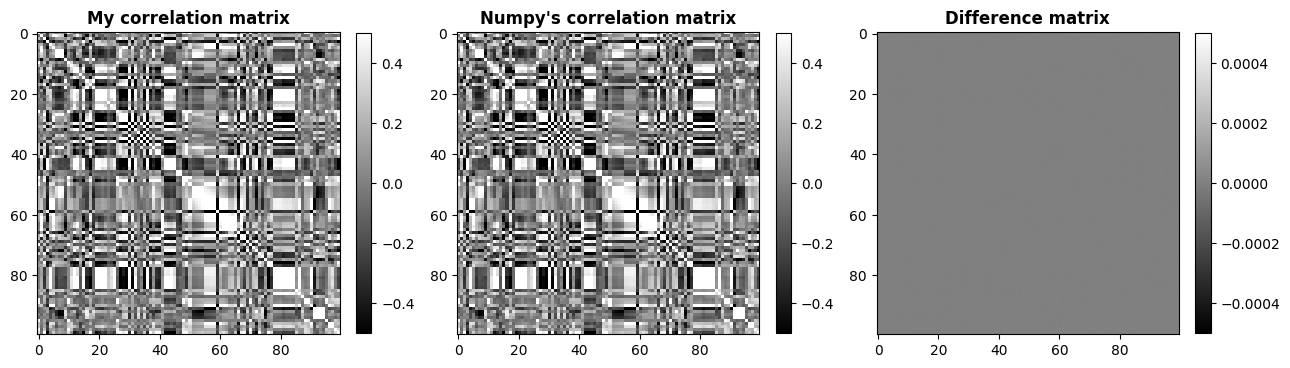

In [8]:
# numpy's correlation function (note transposing the matrix!)
corrMat_np = np.corrcoef(dataMat.T)


# and show it
fig,axs = plt.subplots(1,3,figsize=(13,6))
h1 = axs[0].imshow(corrMat,vmin=-.5,vmax=.5,cmap='gray')
axs[0].set_title('My correlation matrix',fontweight='bold')

h2 = axs[1].imshow(corrMat_np,vmin=-.5,vmax=.5,cmap='gray')
axs[1].set_title("Numpy's correlation matrix",fontweight='bold')

h3 = axs[2].imshow(corrMat_np-corrMat,vmin=-.0005,vmax=.0005,cmap='gray')
axs[2].set_title('Difference matrix',fontweight='bold')

fig.colorbar(h1,ax=axs[0],fraction=.045)
fig.colorbar(h2,ax=axs[1],fraction=.045)
fig.colorbar(h3,ax=axs[2],fraction=.045)

plt.tight_layout()
plt.savefig('Figure_06_07.png',dpi=300)
plt.show()

### [연습문제 6-3]


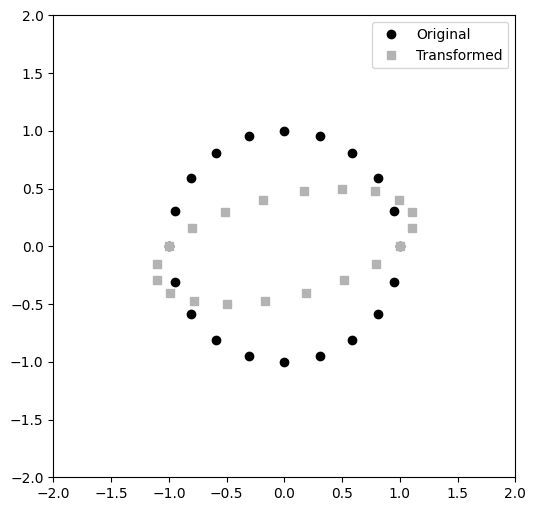

In [9]:
# Transformation matrix
T = np.array([
              [1,.5],
              [0,.5]
            ])


# define the set of points (a circle)
theta = np.linspace(0,2*np.pi-2*np.pi/20,20)
origPoints = np.vstack( (np.cos(theta),np.sin(theta)) )

# apply transformation
transformedPoints = T @ origPoints


# plot the points
plt.figure(figsize=(6,6))
plt.plot(origPoints[0,:],origPoints[1,:],'ko',label='Original')
plt.plot(transformedPoints[0,:],transformedPoints[1,:],'s',
         color=[.7,.7,.7],label='Transformed')

plt.axis('square')
plt.xlim([-2,2])
plt.ylim([-2,2])
plt.legend()
plt.savefig('Figure_06_08.png',dpi=300)
plt.show()